## Supervised Learning
* When we have the training data where each instance has
an input (a set of attributes) and a desired output (a target class)
* Supervised learning methods are nowadays a standard tool in a wide range
of disciplines, from medical diagnosis to natural language processing, image
recognition, and searching for new particles at the Large Hadron Collider (LHC). 

#### 1. Image recognition with Support Vector Machines
* Imagine that the instances in your dataset are points in a multidimensional space;
we can assume that the model built by our classifier can be a surface or using linear
algebra terminology, a hyperplane that separates instances (points) of one class
from the rest. Support Vector Machines (SVM) are supervised learning methods
that try to obtain these hyperplanes in an optimal way, by selecting the ones that
pass through the widest possible gaps between instances of different classes. New
instances will be classified as belonging to a certain category based on which side of
the surfaces they fall on.

In [6]:
import sklearn as sk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd

In [4]:
faces = fetch_olivetti_faces()

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [9]:
pd.DataFrame(faces.data)[:2]

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893


In [11]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [12]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [13]:
faces.data.shape

(400, 4096)

In [15]:
faces.images.shape

(400, 64, 64)

In [16]:
faces.target.shape

(400,)

In [38]:
faces.target[:2]

array([0, 0])

In [31]:
def print_faces(images, target, top_n = 20):
    fig = plt.figure(figsize=(10, 10))
    fig.subplots_adjust(left=0, right=1, bottom =0, top =1,
                       hspace = .05, wspace = .5)
    for i in range(top_n):
        p = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0,14, str(target[i]))
        p.text(0, 60, str(i))

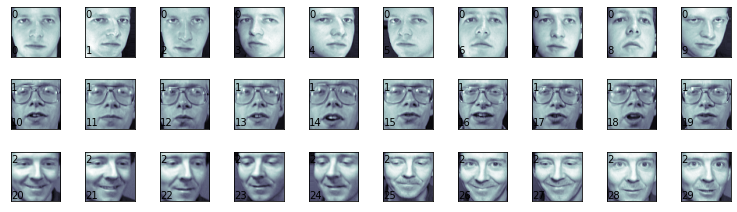

In [32]:
print_faces(faces.images, faces.target, 30)

### Training a Support Vector Machine
> To use SVM in scikit-learn to solve our task, we will import the SVC class from the
sklearn.svm module:

In [34]:
from sklearn.svm import SVC

> The Support Vector Classifier (SVC) will be used for classification

In [35]:
svc_1 = SVC(kernel ='linear')

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
 faces.data, faces.target, test_size=0.25, random_state=33)

In [41]:
from scipy.stats import sem

In [51]:
def evaluate_cross_validation(clf, X, y, K):
    cv = KFold(n_splits=K,shuffle=True, random_state=0)
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(
 np.mean(scores), sem(scores)))

In [52]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[0.96666667 0.96666667 0.95       0.88333333 0.88333333]
Mean score: 0.930 (+/-0.019)
